In [1]:
import os
cwd = os.getcwd()

In [2]:
import sys
sys.path.insert(0, cwd + "/src/")

In [3]:
import chanopy

Initialized logger


/home/roman/Documents/code


In [4]:
modm = chanopy.MODManager(path_to_data= cwd + '/static/data/mod')

In [5]:
modm.path_to_data, modm.path_to_templates, modm.path_to_mechanisms

('/home/roman/Documents/code/chanopy2/app/static/data/mod',
 '/home/roman/Documents/code/chanopy2/src/chanopy/templates',
 '/home/roman/Documents/code/chanopy2/app/chanopy/collection')

In [6]:
modm.list_archives()

Available archives in
/home/roman/Documents/code/chanopy2/app/static/data/mod/

├── Base/
│   ├── Na
│   └── Kv
└── Park_2019/
    ├── Park_Ka
    ├── Park_Km
    ├── Na
    ├── Kv
    ├── Park_Ca_LVA
    ├── Park_Ca_HVA
    └── Park_KCa


In [7]:
modm.loader._loaded_archives

['test']

In [8]:
modm.load_archive('Base')

/home/roman/Documents/code/chanopy2/app/static/data/mod/Base
Mod files: "./Kv.mod" "./Na.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Kv.mod
 -> NMODL ../Na.mod
Compiled mod files from "/home/roman/Documents/code/chanopy2/app/static/data/mod/Base"
NEURON mechanisms not found in /home/roman/Documents/code/chanopy2/app/static/data/mod/Base.
Loaded mechanisms from "/home/roman/Documents/code/chanopy2/app/static/data/mod/Base"


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Kv.mod into /home/roman/Documents/code/chanopy2/app/static/data/mod/Base/x86_64/Kv.c
Translating Na.mod into /home/roman/Documents/code/chanopy2/app/static/data/mod/Base/x86_64/Na.c
syntax error:
 Illegal block at line 112 in file Na.mod
this text won't be captured by the parser
    ^
Thread Safe
make: *** [makemod2c_inc:11: Na.c] Error 1
make: *** Waiting for unfinished jobs....
Traceback (most recent call last):
  File "/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl", line 94, in <module>
    subprocess.check_call([exe, *sys.argv[1:]])
  File "/home/roman/anaconda3/envs/dendrotweaks/lib/python3.11/subprocess.py", line 413, in check_call
    raise CalledProcessError(retcode, cmd)
subprocess.CalledProcessError: Command '['/home/roman/anaconda3/envs/dendr

In [9]:
modm.read(file_name='Na', archive_name='Park_2019')

Reading file:
/home/roman/Documents/code/chanopy2/app/static/data/mod/Park_2019/Na.mod


In [10]:
config = {
    "remove_unitsoff": True, 
    "remove_inline_comments":True, 
    "remove_suffix_from_gbar":True
}

modm.preprocess(config)

Removed suffix from 'gbar' (e.g. gnabar -> gbar)
Removed 'UNITSOFF' and 'UNITSON'
Removed inline comments
Split content into blocks:
    1 - TITLE
    1 - COMMENT
    1 - NEURON
    1 - UNITS
    1 - PARAMETER
    1 - ASSIGNED
    1 - STATE
    1 - BREAKPOINT
    1 - DERIVATIVE
    1 - INITIAL
    1 - FUNCTION
    1 - PROCEDURE
    0 - KINETIC
No unmatched content.


In [11]:
modm.blocks

{'TITLE': ['TITLE Na channel\n'],
 'COMMENT': ['COMMENT\n26 Ago 2002 Modification of original channel to allow variable time\nstep and to correct an initialization error.\n    Done by Michael Hines(michael.hines@yale.e) and Ruggero\nScorcioni(rscorcio@gmu.edu) at EU Advance Course in Computational\nNeuroscience. Obidos, Portugal\n11 Jan 2007\n    Glitch in trap where (v/th) was where (v-th)/q is. (thanks Ronald\nvan Elburg!)\n\nna.mod\n\nSodium channel, Hodgkin-Huxley style kinetics.  \n\nKinetics were fit to data from Huguenard et al. (1988) and Hamill et\nal. (1991)\n\nMainen, Z. F., Joerges, J., Huguenard, J. R., & Sejnowski, T. J. (1995). \nA model of spike initiation in neocortical pyramidal neurons. \nNeuron, 15(6), 1427–1439. doi\nENDCOMMENT'],
 'NEURON': ['NEURON {\n\tSUFFIX Na\n\tUSEION na READ ena WRITE ina\n\tRANGE gbar, i, v12m, qm, v12ha, v12hb, qh, v12hinf, qhinf, Rma, Rmb, Rhb, Rha\n}'],
 'UNITS': ['UNITS {\n\t(mA) = (milliamp)\n\t(mV) = (millivolt)\n\t(S)  = (siemens)\n

# Parsing

In [12]:
modm.parse()

Parsed TITLE block.
Parsed COMMENT block.
Parsed NEURON block.
Parsed UNITS block.
Parsed PARAMETER block.
Parsed ASSIGNED block.
Parsed STATE block.
Parsed BREAKPOINT block.
Parsed DERIVATIVE block.
Parsed INITIAL block.
Parsed FUNCTION block.
Parsed PROCEDURE block.


In [13]:
config = {
        "update_state_vars_with_powers":True, 
        "replace_constants_with_values":True, 
        "restore_expressions":True
}

modm.postprocess(config)

Restoring expressions in BREAKPOINT
Restoring expressions in DERIVATIVE
Restoring expressions in FUNCTION
Restoring expressions in PROCEDURE


In [14]:
ast = modm.ast

In [15]:
import json 
with open(cwd + '/static/data/Na.json', 'w') as f:
    json.dump(modm.parser._ast, f, indent=4)

# Generate python code

In [16]:
modm.path_to_templates
import os
os.listdir(modm.path_to_templates)

['template_dd.py', 'template2.py', 'template_jaxley.py']

In [17]:
template_name = 'template_dd'

In [18]:
modm.ast_to_python(template_name)

/home/roman/Documents/code/chanopy2/src/chanopy/templates/template_dd.py


In [19]:
modm.path_to_mechanisms

'/home/roman/Documents/code/chanopy2/app/chanopy/collection'

In [20]:
modm.write()

Saved content to /home/roman/Documents/code/chanopy2/app/chanopy/collection/Na.py


# Test the channel

In [21]:
from chanopy.mechanisms import IonChannel

In [22]:
from static.data.collection.Na import Na
from static.data.collection.Kv import Kv
import numpy as np

In [23]:
# kv = Kv()
na = Na()

In [24]:
na.name

'Na'

In [25]:
v = np.linspace(-100, 100, 1000)

In [26]:
data = na.get_data(v)

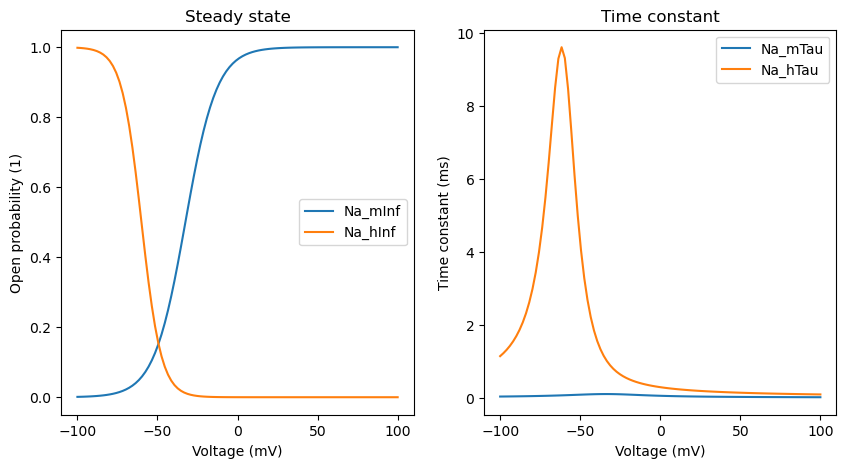

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
na.plot_kinetic_variables(ax)
# kv.plot_kinetic_variables(ax)